## How to pull elevation data from the National Map WCS Services 

by: Colin Talbert 2018-11-14

In [1]:
%matplotlib inline

import owslib
from owslib.wcs import WebCoverageService

In [2]:
owslib.__version__

'0.17.0'

#### Connect to the service and take a look at it's contents

In [3]:
wcs=WebCoverageService('https://elevation.nationalmap.gov:443/arcgis/services/3DEPElevation/ImageServer/WCSServer',version='1.0.0')
# Take a look at the contents (coverages) of the wcs.

for k, v in wcs.contents.items():
    print(k, ": ", v)

DEP3ElevationPrototype :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E1648D0>
DEP3ElevationPrototype_Hillshade Gray :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E164FD0>
DEP3ElevationPrototype_Aspect Degrees :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931D14B470>
DEP3ElevationPrototype_Aspect Map :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931D14B358>
DEP3ElevationPrototype_GreyHillshade_elevationFill :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17C2B0>
DEP3ElevationPrototype_Hillshade Multidirectional :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17CA20>
DEP3ElevationPrototype_Slope Map :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17CBE0>
DEP3ElevationPrototype_Slope Degrees :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17C240>
DEP3ElevationPrototype_Hillshade Elevation Tinted :  <owslib.coverage.wcs100.ContentMetadata object at 0x0000029

In [4]:
elev=wcs['DEP3ElevationPrototype']

output = wcs.getCoverage(identifier='DEP3ElevationPrototype', bbox=(-90,40,-88,41), format='GeoTIFF', resx=0.001, resy=0.001, crs=4326)
contents = output.read()

### contents here are a geotiff written out as a string.
here's some things we can do with this

### 1) Save it out to a file

In [5]:
f=open('elevation.tif','wb')
f.write(contents)
f.close()

### 2) load it directly into a rasterio layer

In [6]:
from rasterio.io import MemoryFile
elev = MemoryFile(contents).open()

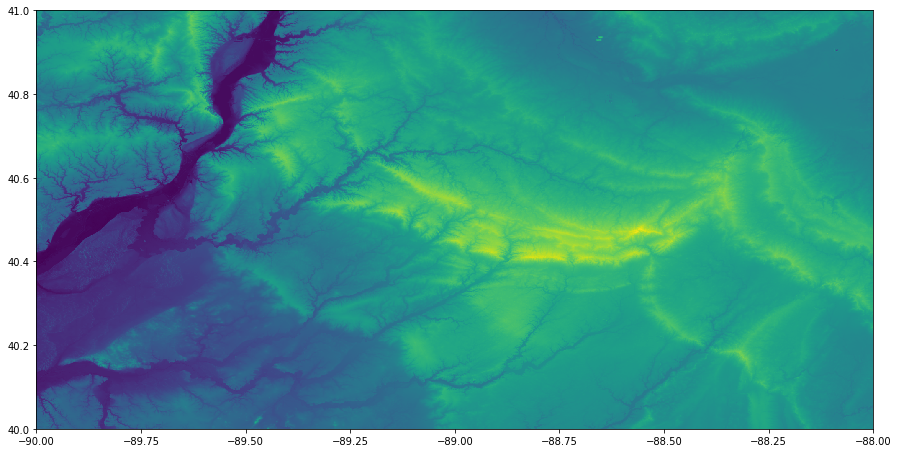

In [7]:
from matplotlib import pyplot as plt
from rasterio import plot

fig, ax = plt.subplots(1, 1, figsize=(15,25))
plot.show(elev, ax=ax)

### 3) get a numpy array of the data (from the rasterio memfile)

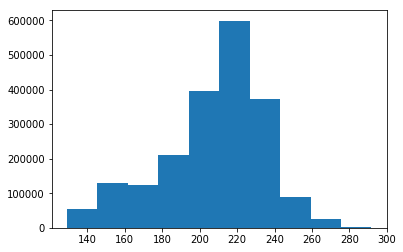

In [8]:
data = elev.read(1)

plt.hist(data.flatten())  # arguments are passed to np.histogram
plt.show()


## What do the other layers look like?

DEP3ElevationPrototype :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E1648D0>
DEP3ElevationPrototype_Hillshade Gray :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E164FD0>
DEP3ElevationPrototype_Aspect Degrees :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931D14B470>
DEP3ElevationPrototype_Aspect Map :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931D14B358>
DEP3ElevationPrototype_GreyHillshade_elevationFill :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17C2B0>
DEP3ElevationPrototype_Hillshade Multidirectional :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17CA20>
DEP3ElevationPrototype_Slope Map :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17CBE0>
DEP3ElevationPrototype_Slope Degrees :  <owslib.coverage.wcs100.ContentMetadata object at 0x000002931E17C240>
DEP3ElevationPrototype_Hillshade Elevation Tinted :  <owslib.coverage.wcs100.ContentMetadata object at 0x0000029

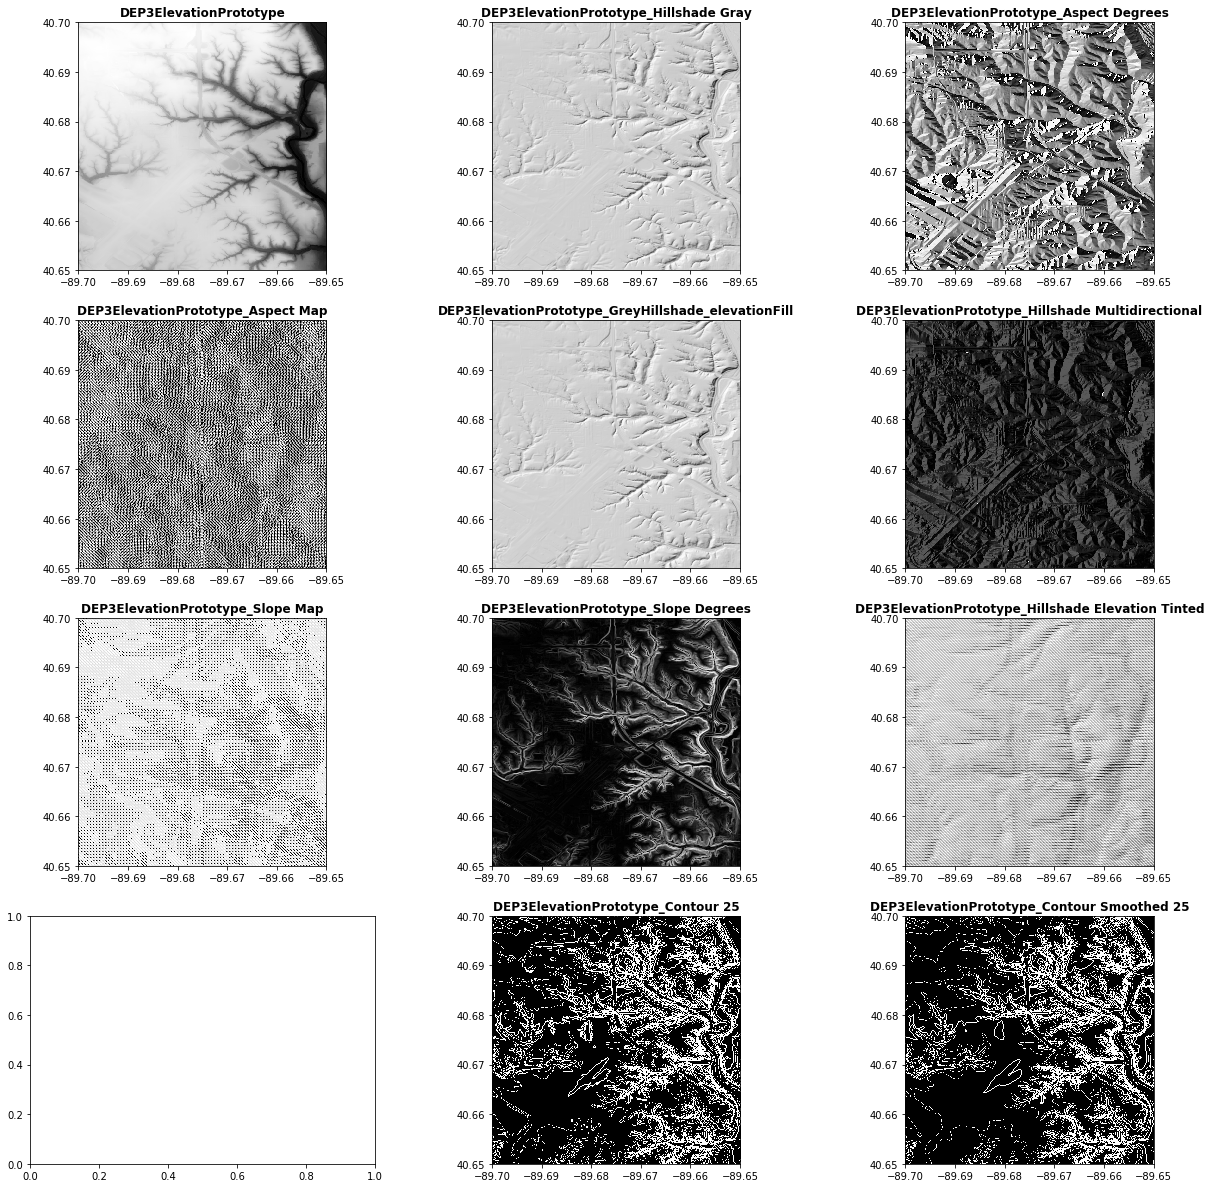

In [9]:

fig, axes = plt.subplots(4,3, figsize=(21,21))

i = 0
for k, v in wcs.contents.items():
    print(k, ": ", v)
    try:
        output = wcs.getCoverage(identifier=k, bbox=(-89.7, 40.65, -89.65, 40.7), format='GeoTIFF', resx=0.0001, resy=0.0001, crs=4326)
        contents = output.read()

        layer = MemoryFile(contents).open()
    
        plot.show(layer, ax=axes.flatten()[i], title=k, cmap='Greys_r')
    except:
        pass
    i += 1